In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
location = 'C:/Users/cathe/projects/new-york-city-airbnb-open-data/'
df = pd.read_csv(location + 'AB_NYC_2019.csv',header=0)

In [3]:
df.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [4]:
#Unique neighbourhood groups 
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [5]:
#Unique neighbourhoods
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [6]:
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [7]:
top_host_check=df.calculated_host_listings_count.max()
top_host_check

327

In [8]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})

[Text(0, 0, '219517861'),
 Text(0, 0, '107434423'),
 Text(0, 0, '30283594'),
 Text(0, 0, '137358866'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '61391963'),
 Text(0, 0, '22541573'),
 Text(0, 0, '200380610'),
 Text(0, 0, '7503643')]

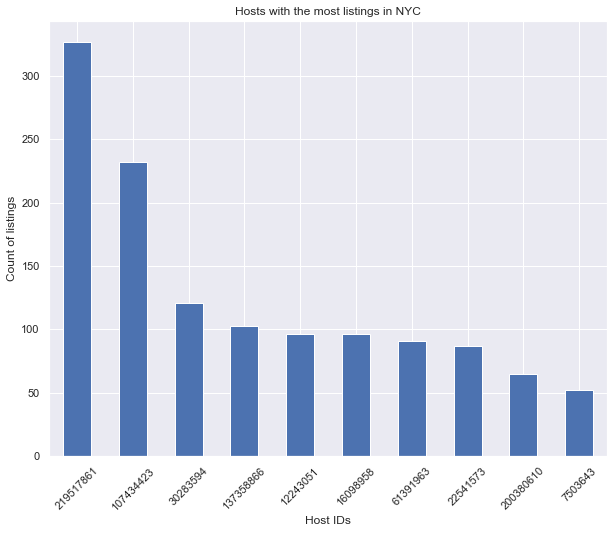

In [9]:
viz_1=top_host.plot(kind='bar')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

There is a good distribution between the top 10 hosts with the most listings. The first host has more than 300+ listings.

### Where these Airbnbs are located

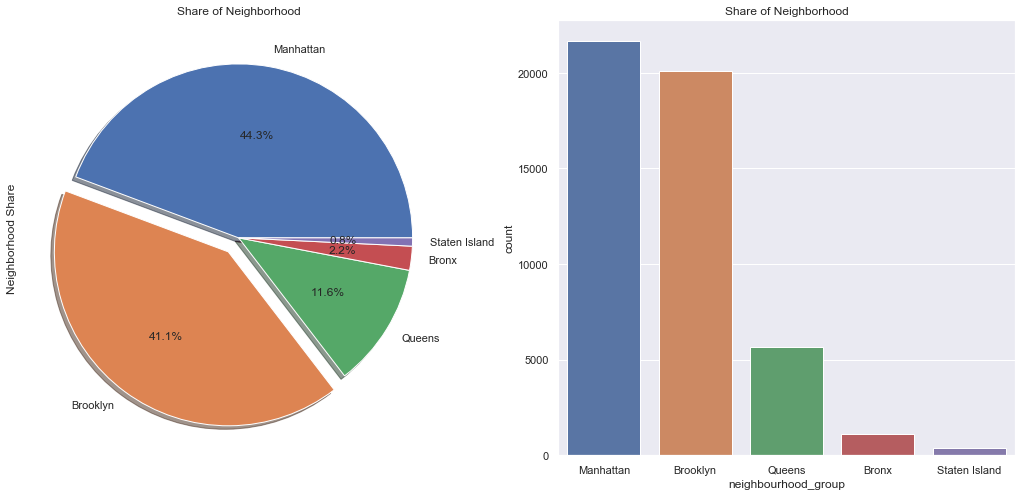

In [10]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

Manhattan and Brooklyn have the largest share of Airbnbs.

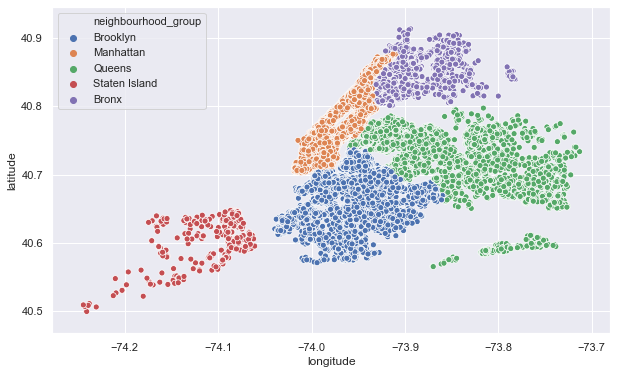

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [12]:
import folium
from folium.plugins import HeatMap
m=folium.Map([40.7128,-74.0060],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

High density areas are marked in a red color and lower density areas are marked in blue color.

## Price Distribution of Airbnbs

### Price variation based on area

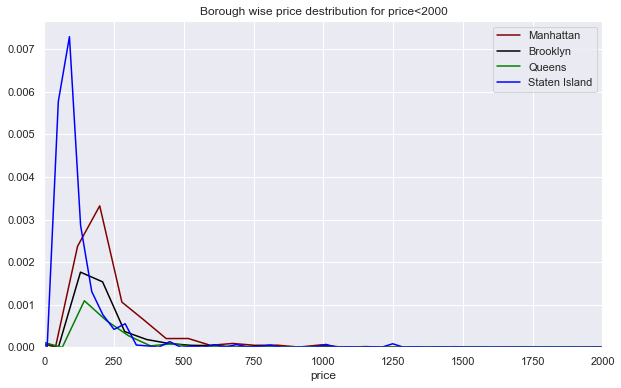

In [13]:
plt.figure(figsize=(10,6))
sns.distplot(df[df.neighbourhood_group=='Manhattan'].price,color='maroon',hist=False,label='Manhattan')
sns.distplot(df[df.neighbourhood_group=='Brooklyn'].price,color='black',hist=False,label='Brooklyn')
sns.distplot(df[df.neighbourhood_group=='Queens'].price,color='green',hist=False,label='Queens')
sns.distplot(df[df.neighbourhood_group=='Staten Island'].price,color='blue',hist=False,label='Staten Island')
sns.distplot(df[df.neighbourhood_group=='Long Island'].price,color='lavender',hist=False,label='Long Island')
plt.title('Borough wise price destribution for price<2000')
plt.xlim(0,2000)
plt.show()

The area wise distribution shows that Manhattan has expensive and Staten Island has lower priced rooms.

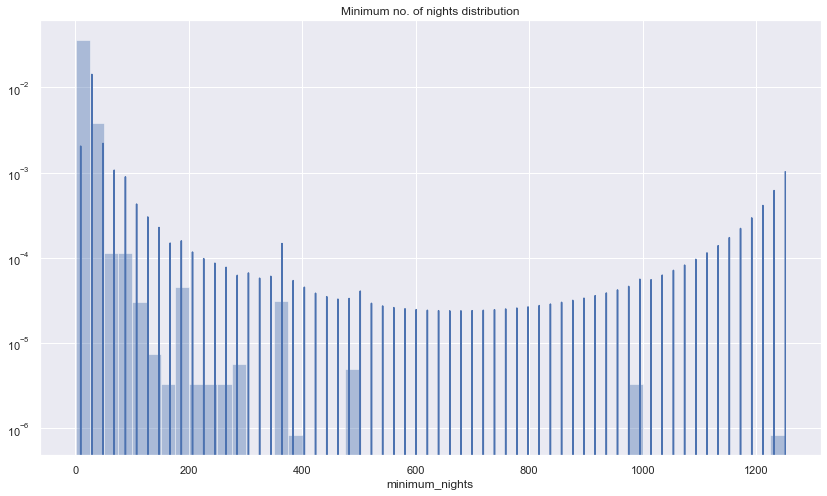

In [14]:
plt.figure(figsize=(14,8))
sns.distplot(df.minimum_nights).set_yscale('log')
plt.title('Minimum no. of nights distribution')
plt.show()

### Price Distribution based on Number of Reviews

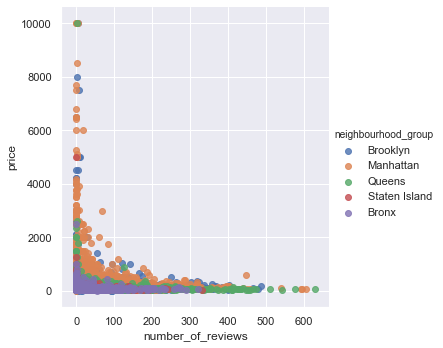

In [15]:
sns.lmplot(x='number_of_reviews',y='price', data=df,
          fit_reg=False, #No regression line
          hue='neighbourhood_group')

### Price Distribution in Brooklyn

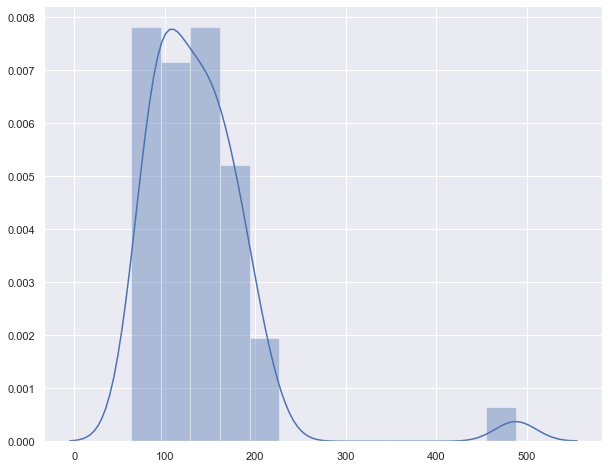

In [16]:
df1 = df[df.neighbourhood_group == 'Brooklyn'][['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

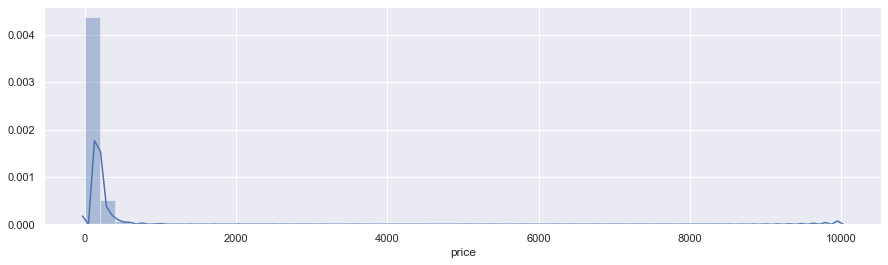

In [17]:
f, ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

Price distribution in Brooklyn averages about 70-500 dollars depending on neighbourhood.

###  Manhattan

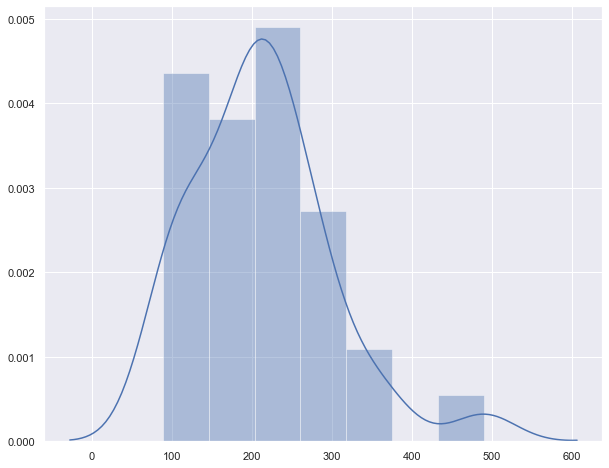

In [18]:
df1 = df[df.neighbourhood_group == 'Manhattan'][['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

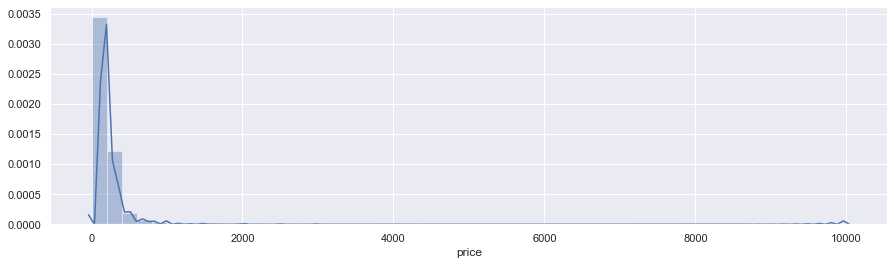

In [19]:
f, ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=='Manhattan']['price']
sns.distplot(df1)
plt.show()

Price distribution in Manhattan around 80-490 dollars per night depending on neighbourhood.

###  Queens

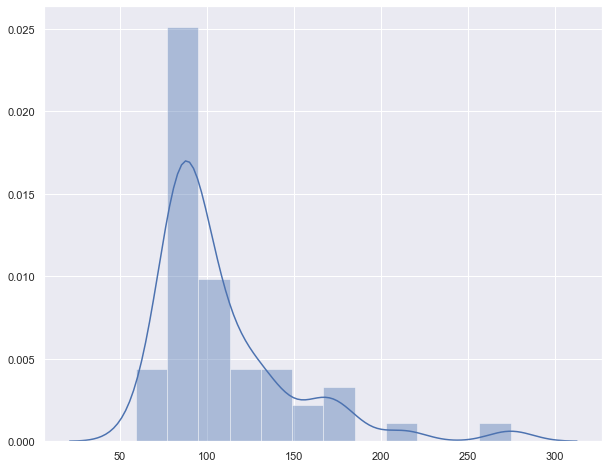

In [20]:
df1 = df[df.neighbourhood_group == 'Queens'][['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

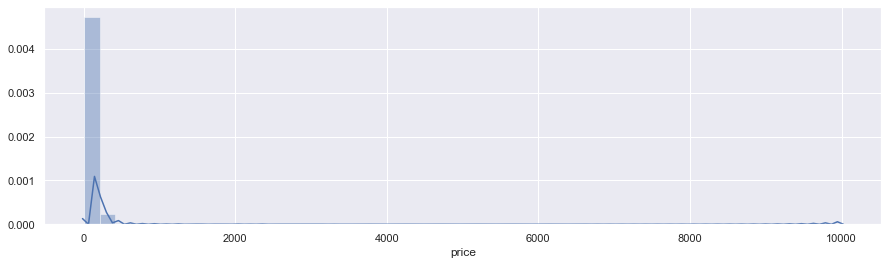

In [21]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=='Queens']['price']
sns.distplot(df1)
plt.show()

Price distribution in Queens averages 60-280 dollars per night depending upon neighbourhood.

### Staten Island

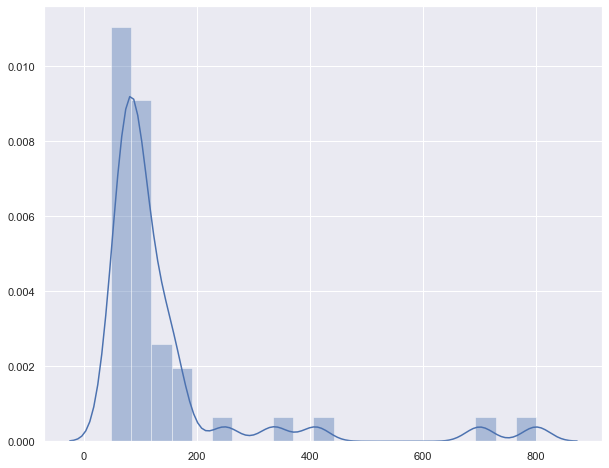

In [22]:
df1 = df[df.neighbourhood_group == 'Staten Island'][['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

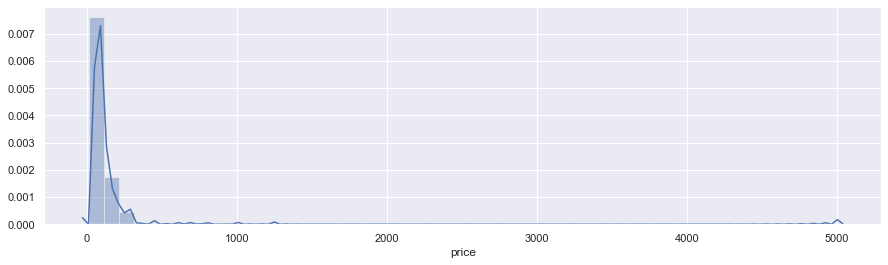

In [23]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=='Staten Island']['price']
sns.distplot(df1)
plt.show()

Price distribution in Staten Island averages about 50-800 dollars per night depending on neighbourhood.

### Bronx

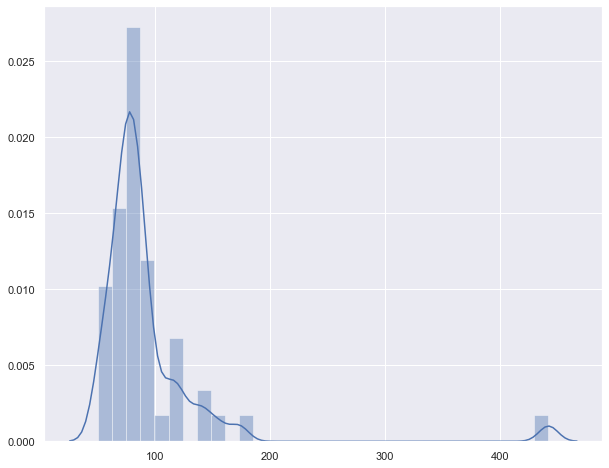

In [24]:
df1 = df[df.neighbourhood_group == 'Bronx'][['neighbourhood','price']]
d = df1.groupby('neighbourhood').mean()
sns.distplot(d)
plt.show()

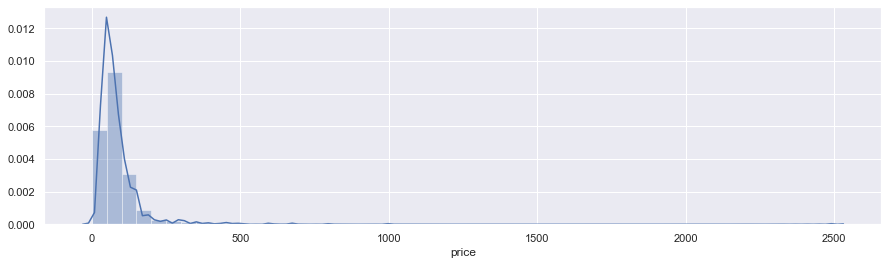

In [25]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=='Bronx']['price']
sns.distplot(df1)
plt.show()

Price distribution in Bronx averages about 50-450 dollars per night depending on neighbourhood.

### Number of different room types

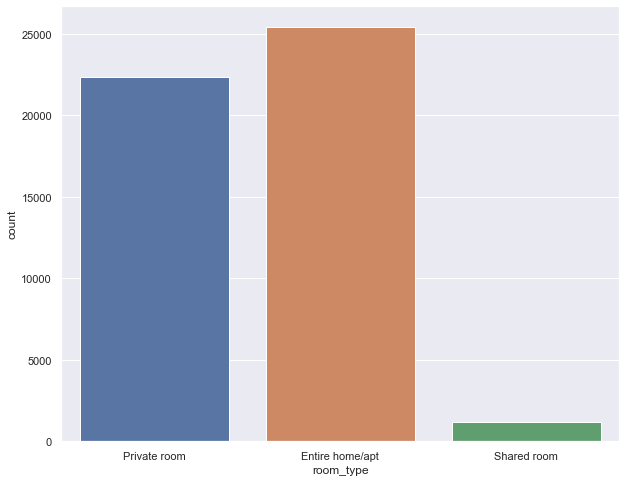

In [26]:
sns.countplot(x='room_type', data=df)

Private room and Entire home/apt room_type have the most listings on Airbnb, whereas shared room has the lowest amount of listings.

### Correlation between neighbourhood group and Availability of Room


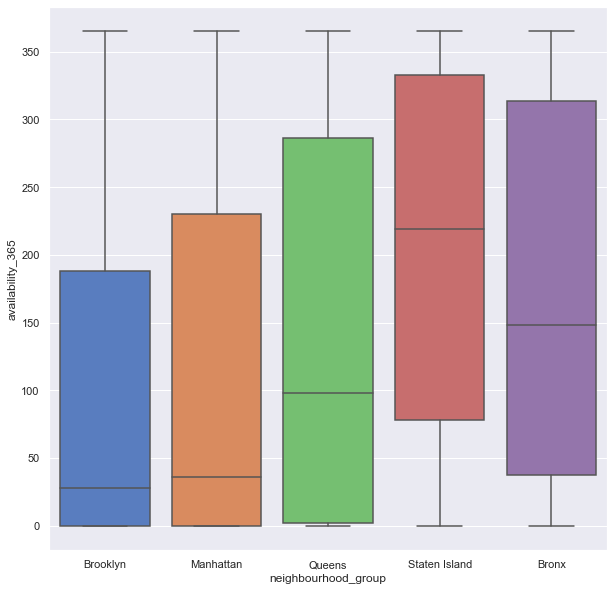

In [27]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='muted')

### Conclusion

The NYC Airbnb dataset is a very rich dataset and provides us with a variety of columns that can be used for data exploration. Airbnb hosts take good advantage of the Airbnb platform and provide ample listings. The top host has 327 listings. The borough and neighbourhood listings were analyzed to find which areas were more popular and affordable. Price distribution per night depends on the neighbourhood area. Manhattan and Brooklyn have the largest share of Airbnbs with a range between 41-44 percent share of listings. 